In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir= 'C:\\Users\\Administrator\\Desktop\\Task3\\t3.csv'
x=pd.read_csv(dir)
x.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [35]:
x.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


In [36]:
x.isna().sum()
x.ffill(inplace=True)
x.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [37]:
x1 = x['Duration'].values
y1 = x['Calories'].values
N=len(x1)

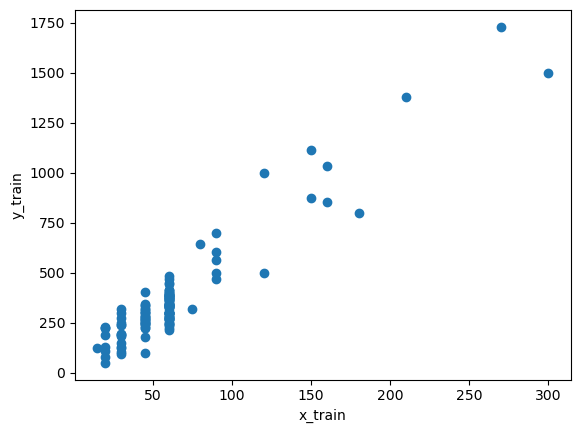

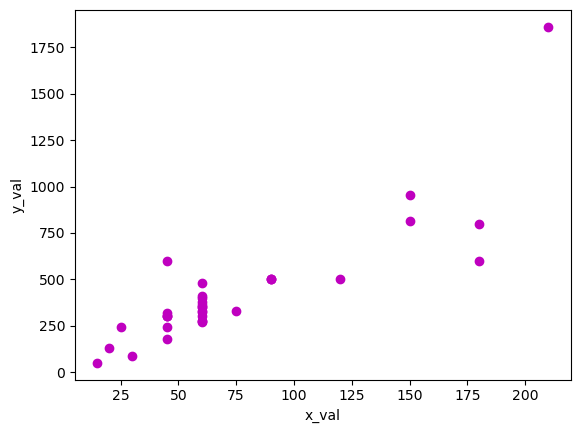

In [38]:
#Splitting Data into train and validation
idx=np.arange(N)
np.random.shuffle(idx)
idx_train=idx[:int(0.8*N)]
idx_test=idx[int(0.8*N):]
x_train, y_train = x1[idx_train],y1[idx_train]
x_val, y_val = x1[idx_test],y1[idx_test]


#plotting tain and val data
plt.figure('1')
plt.scatter(x_train,y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.figure('2')
plt.scatter(x_val,y_val,color = 'm')
plt.xlabel('x_val')
plt.ylabel('y_val')
plt.show(block=True)

In [39]:
#training loop
#initializing parameters
trainLosses=[]
valLosses=[]
lr=0.0001
#w=np.random.randn(1)
#b=np.random.randn(1)
w=4
b=0.1
print(w)
print(b)


4
0.1


train loss=25204.195925925927, val loss=27487.718459502266, w=5.987114814814815, b=0.1232768888888889


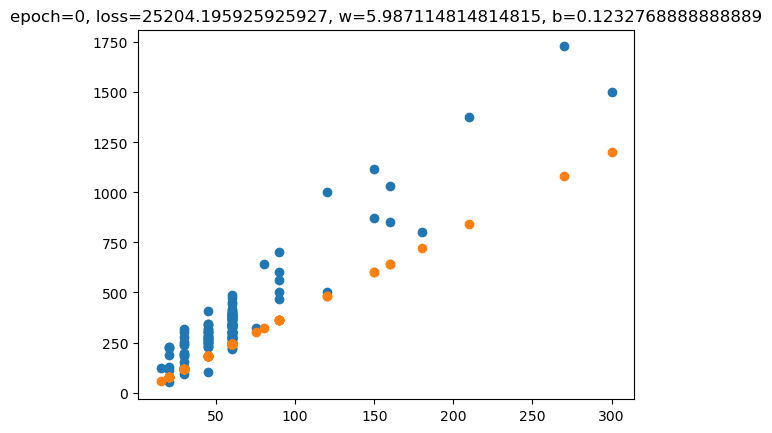

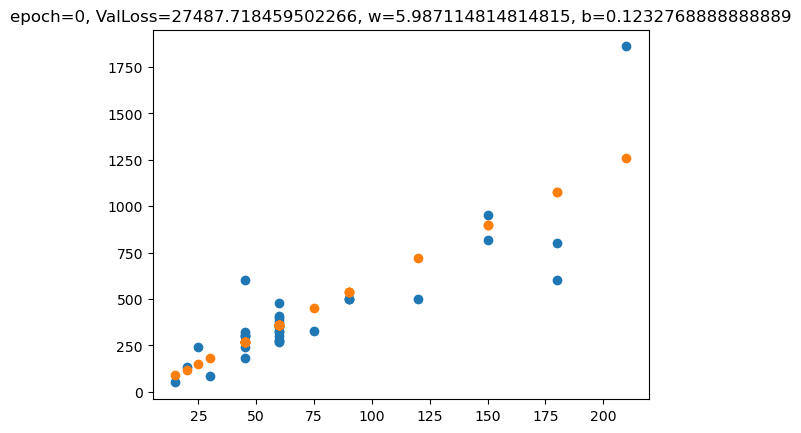

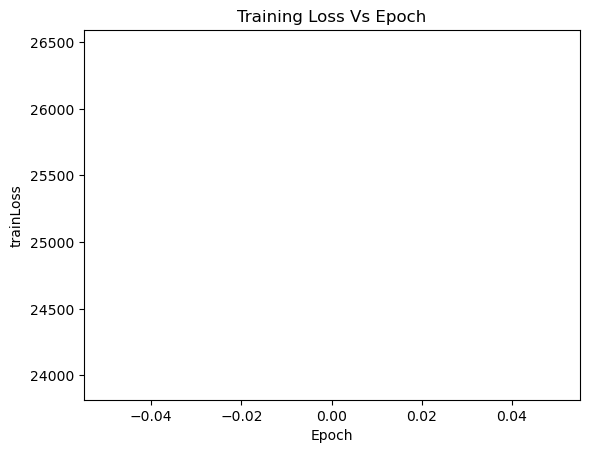

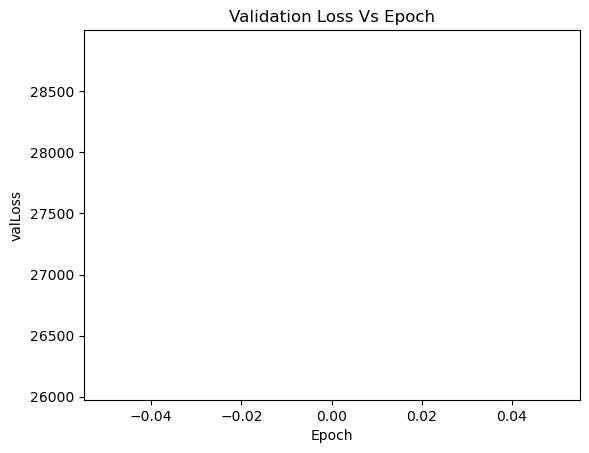

train loss=7015.907249294583, val loss=27186.593337564827, w=5.830362737365157, b=0.12220328607626887


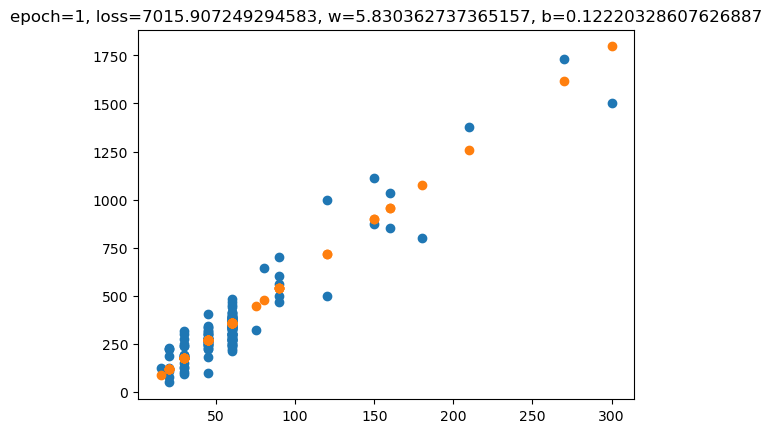

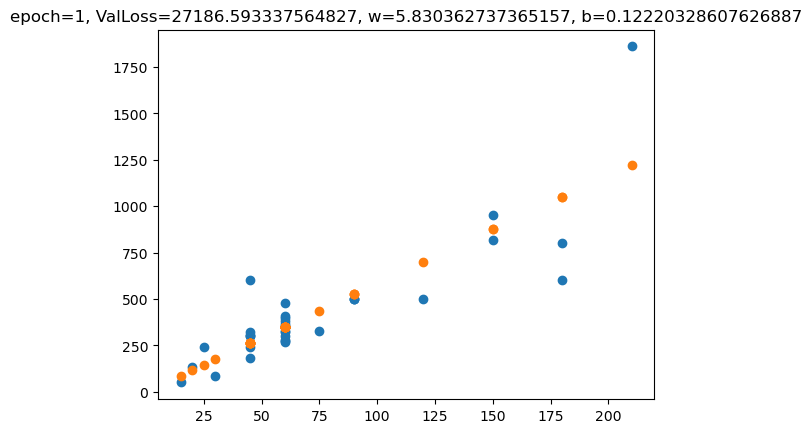

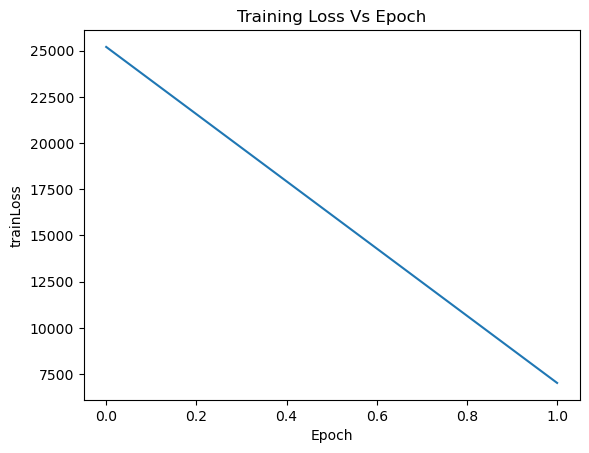

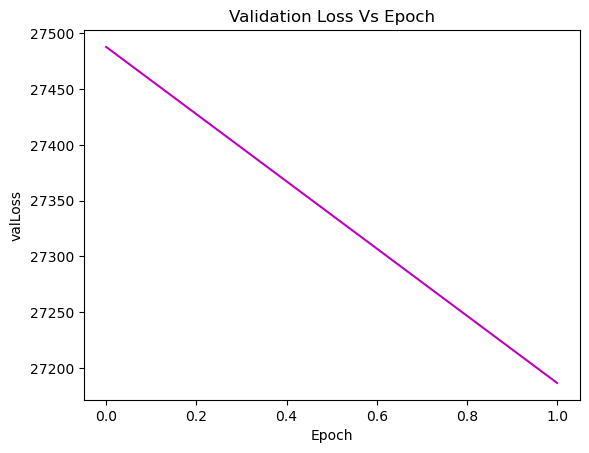

train loss=6902.73405174156, val loss=27196.61754667991, w=5.8427186656788015, b=0.12305040121459458


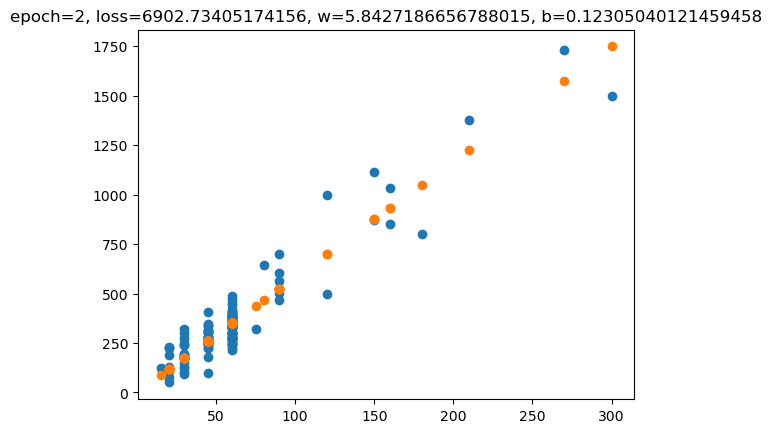

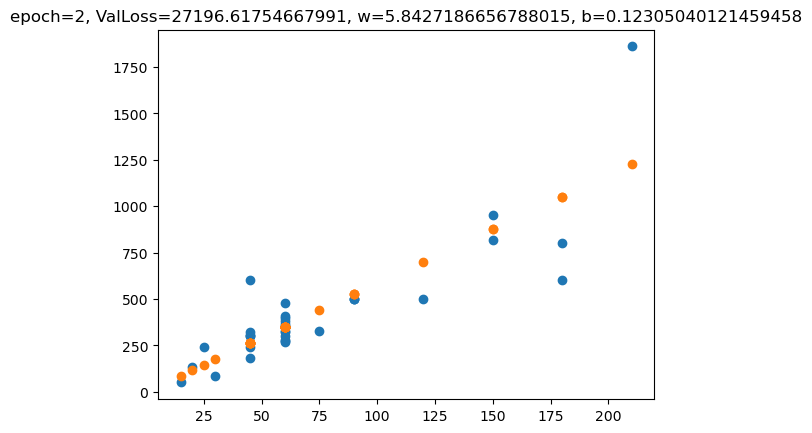

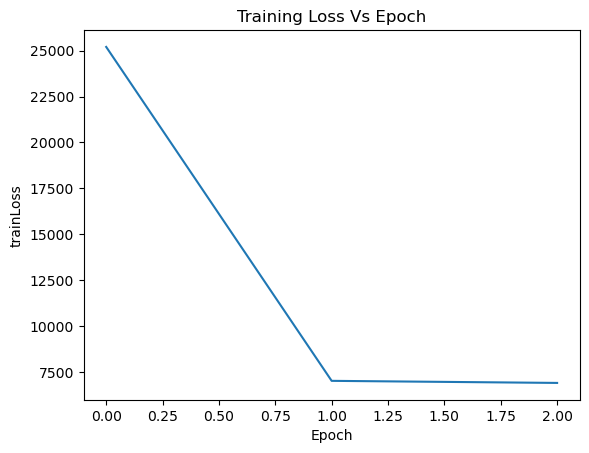

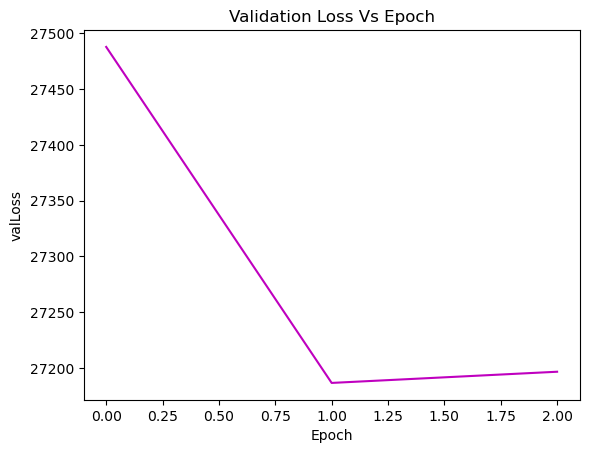

train loss=6902.024920321226, val loss=27195.737899885236, w=5.841735372001669, b=0.12374596392670176


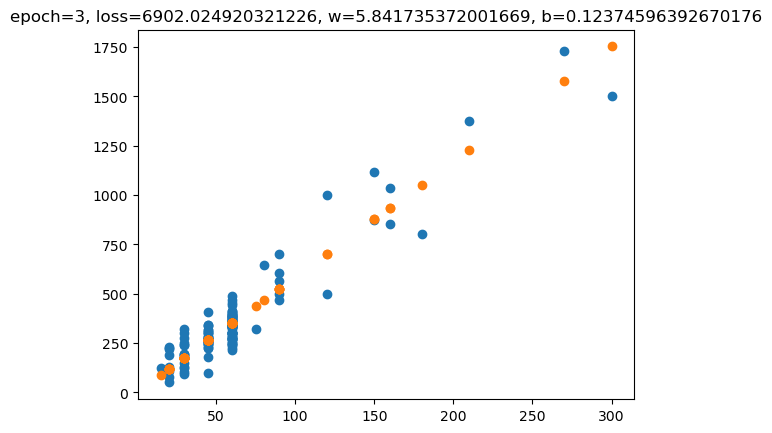

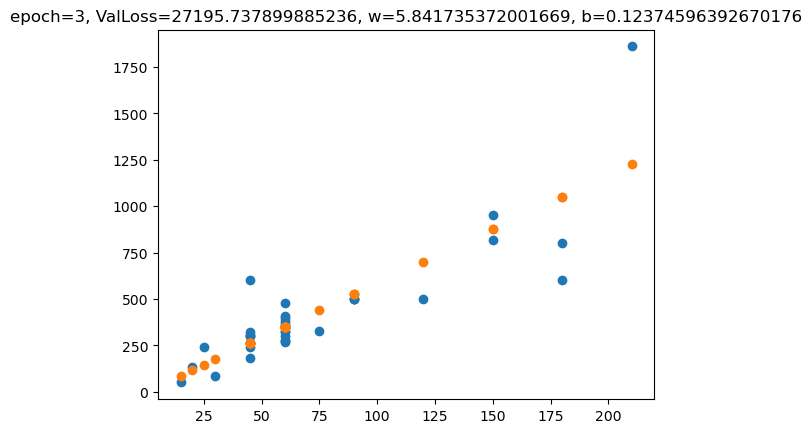

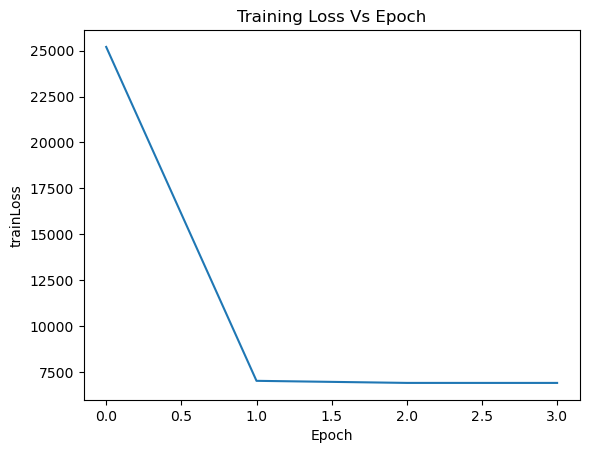

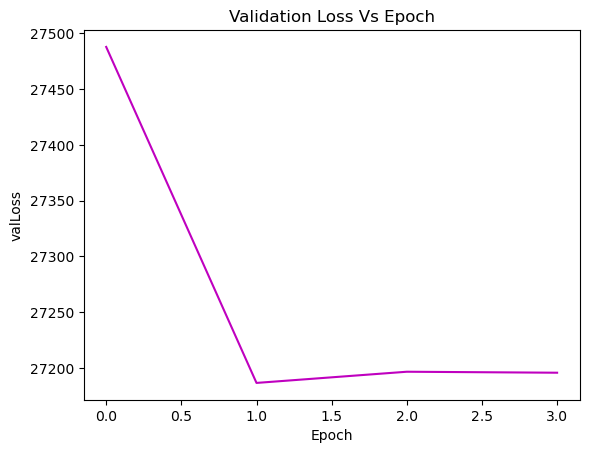

train loss=6902.015545261185, val loss=27195.803193478794, w=5.84180427534287, b=0.12445343469472558


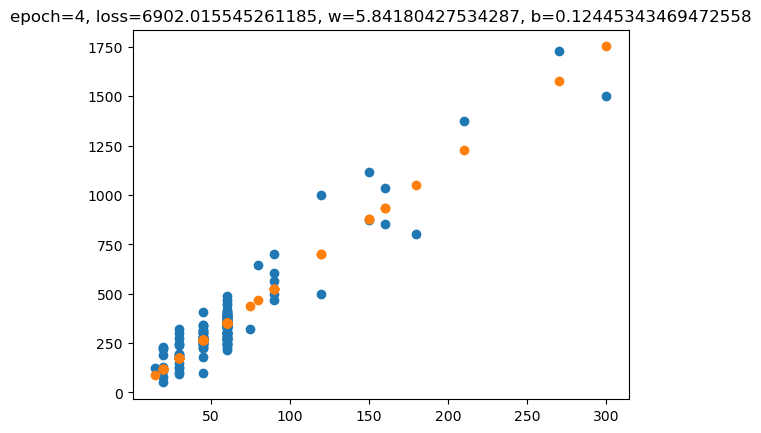

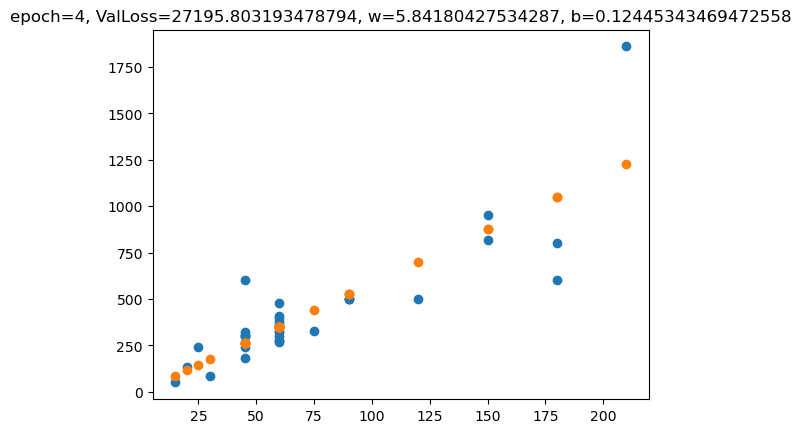

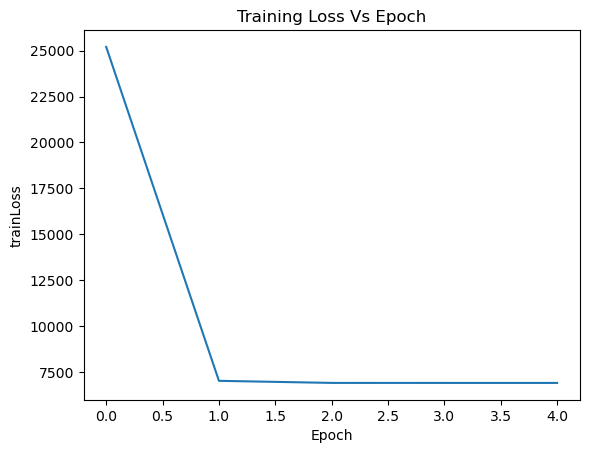

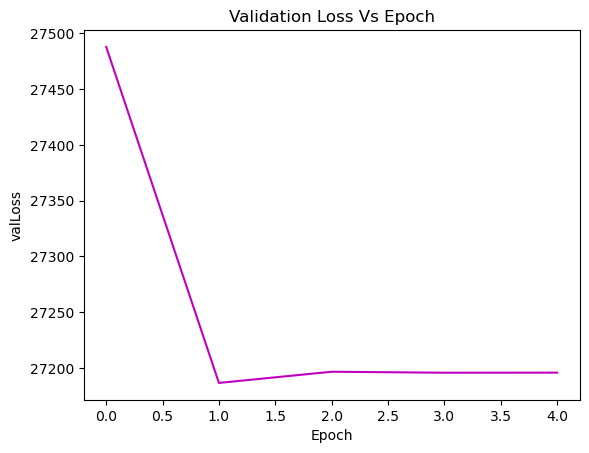

train loss=6902.01052471607, val loss=27195.79448039424, w=5.841790182015705, b=0.12515991977506732


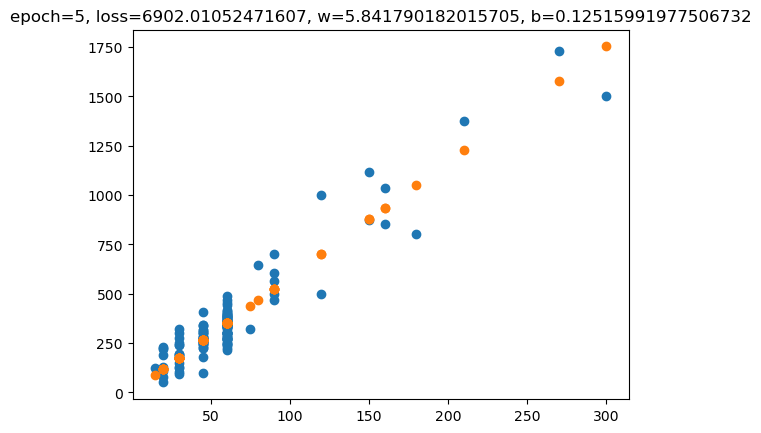

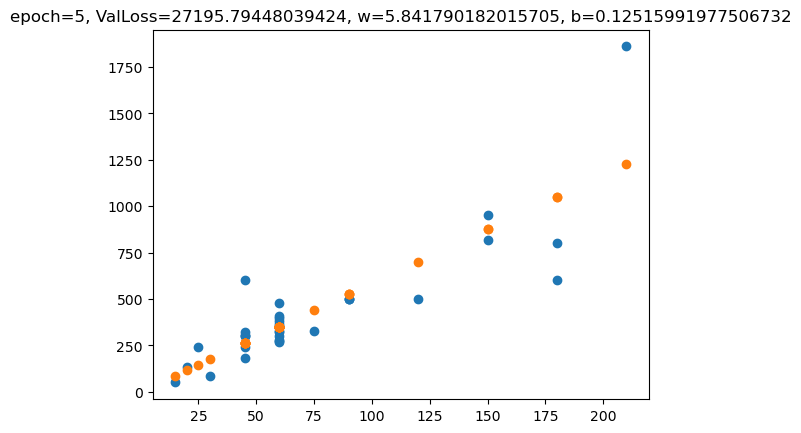

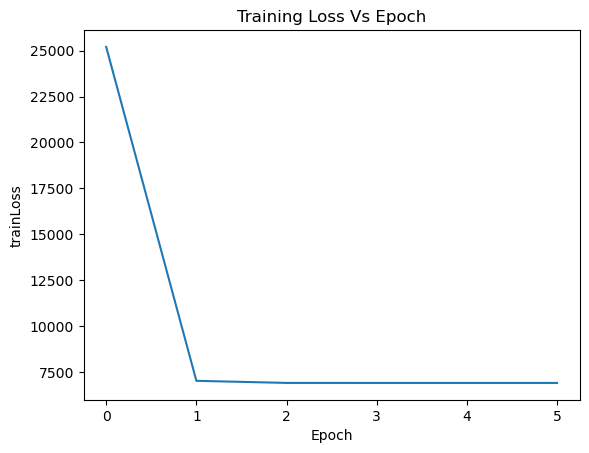

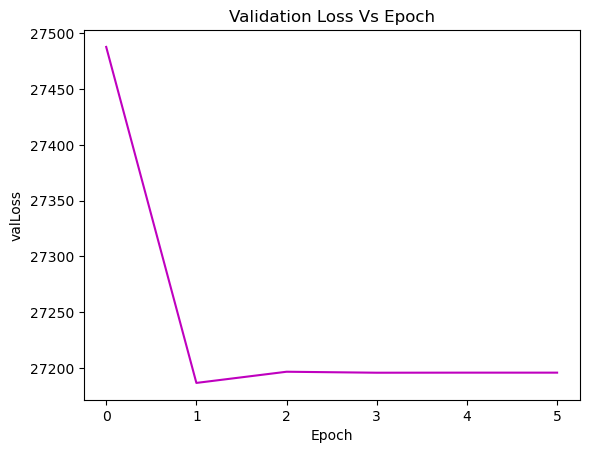

train loss=6902.005531868708, val loss=27195.79160866071, w=5.841782635984186, b=0.1258664362277495


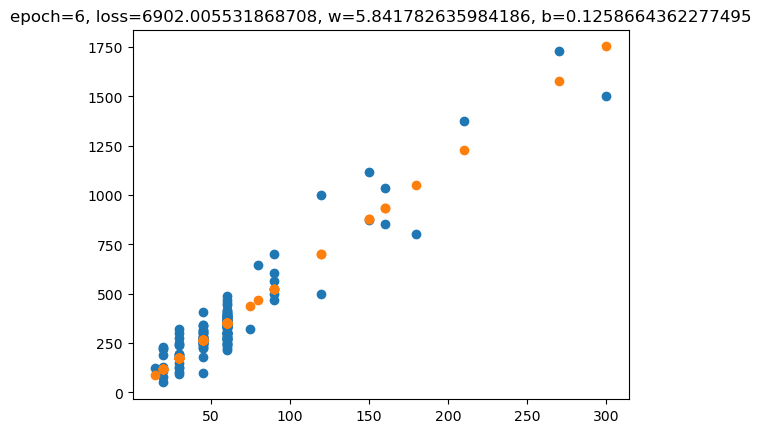

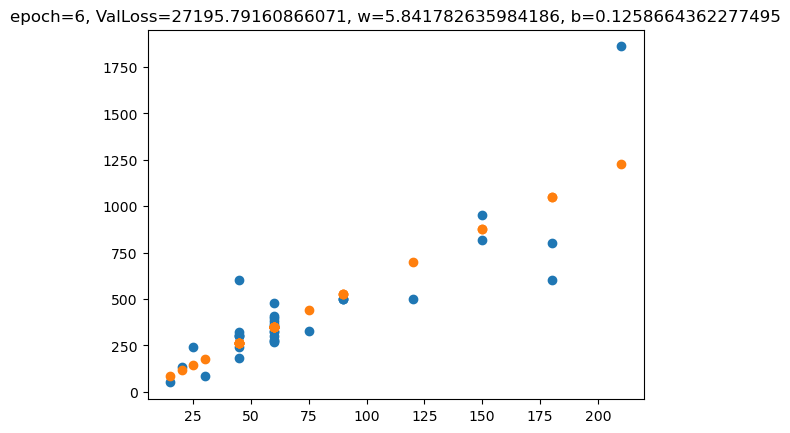

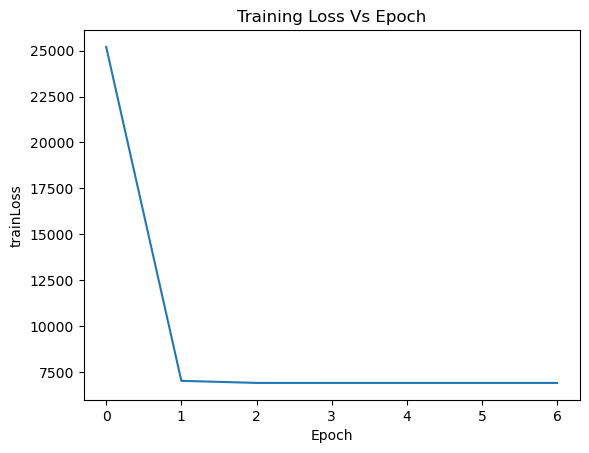

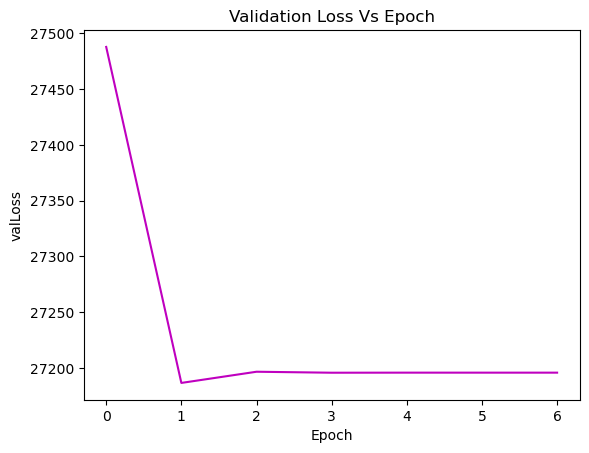

train loss=6902.000539797406, val loss=27195.788276740266, w=5.8417745740293885, b=0.12657290383000142


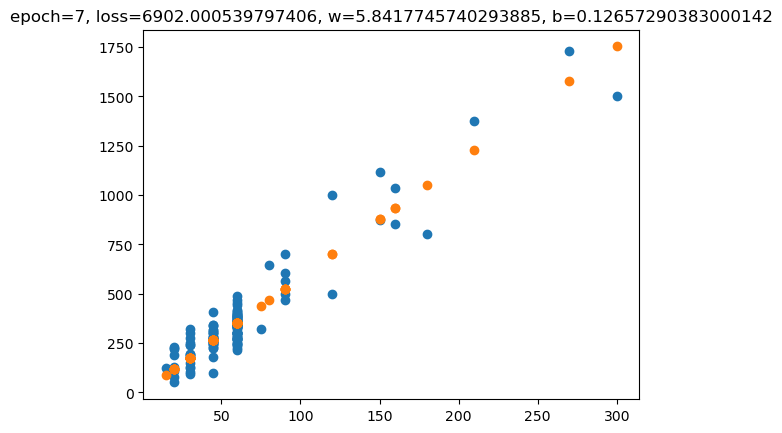

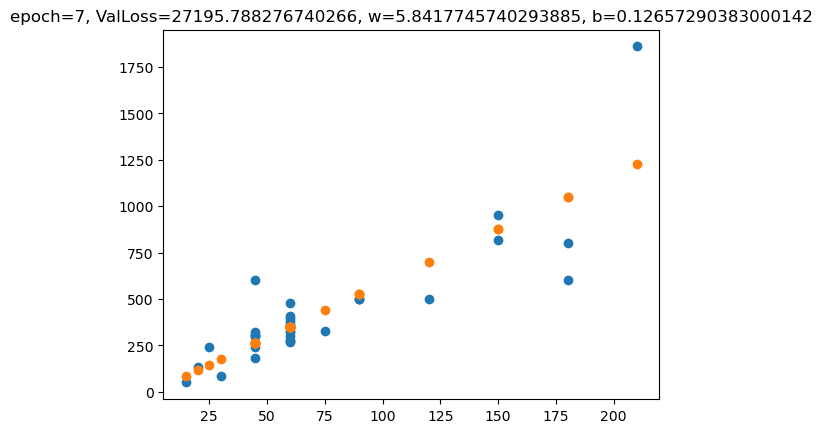

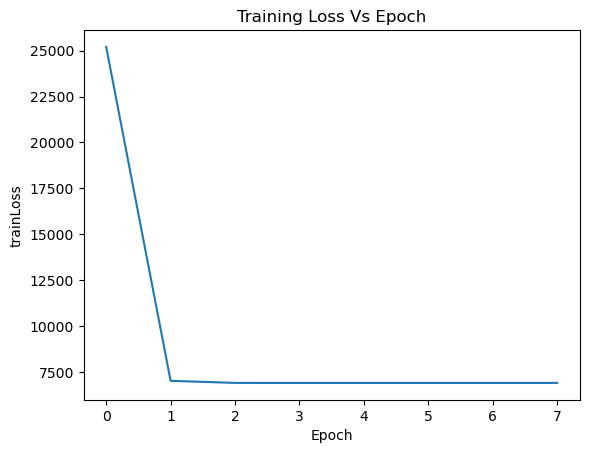

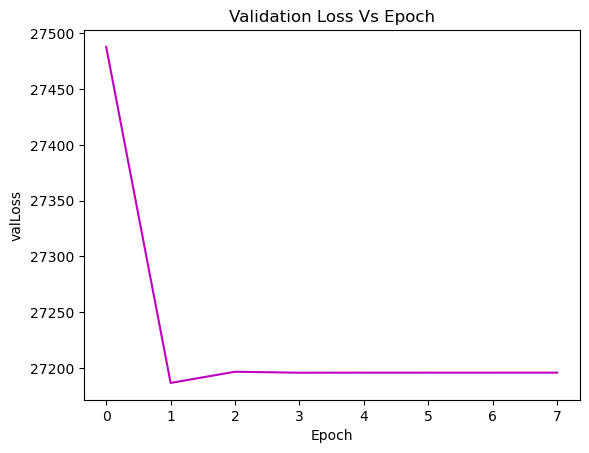

train loss=6901.995548334579, val loss=27195.78498166684, w=5.84176655329728, b=0.12727932891260868


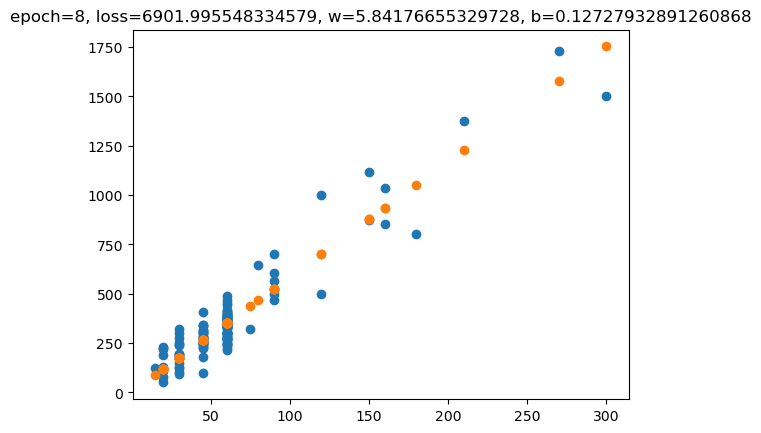

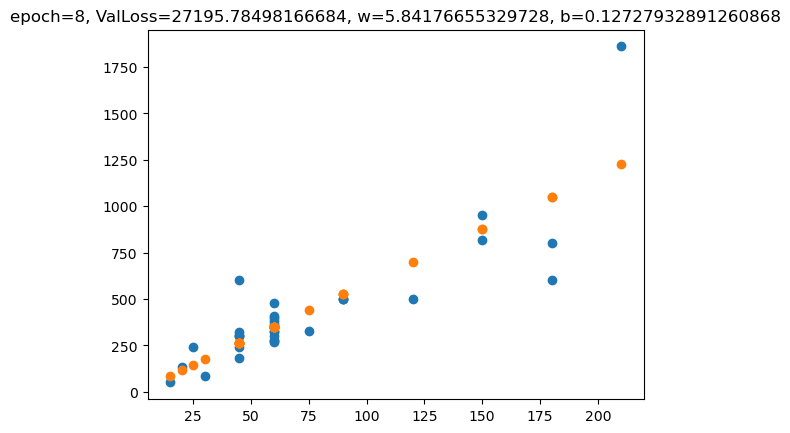

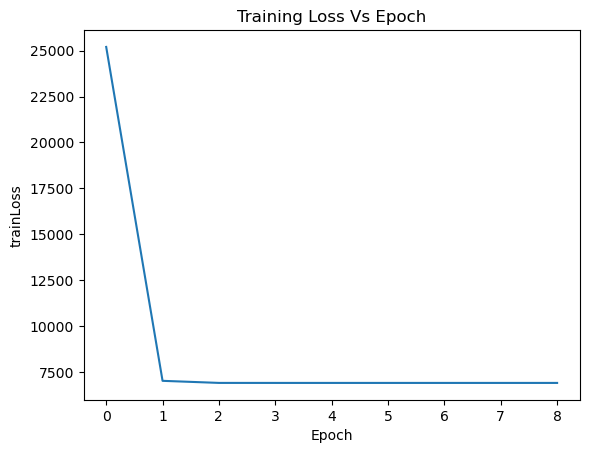

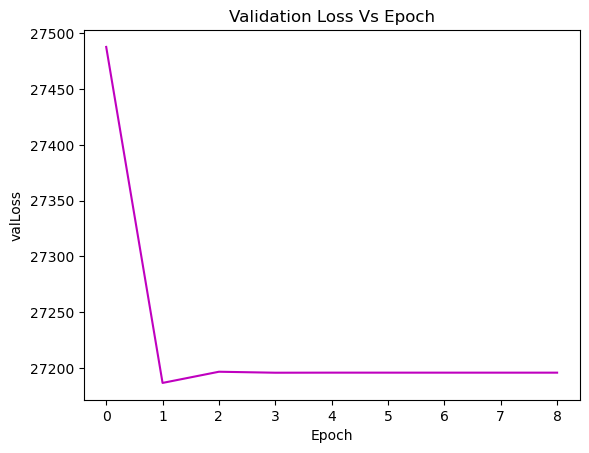

train loss=6901.990557479115, val loss=27195.781684235048, w=5.84175852984021, b=0.12798571097902098


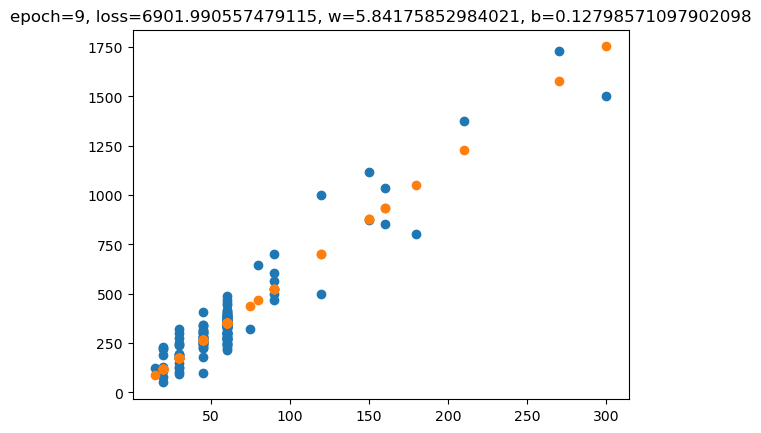

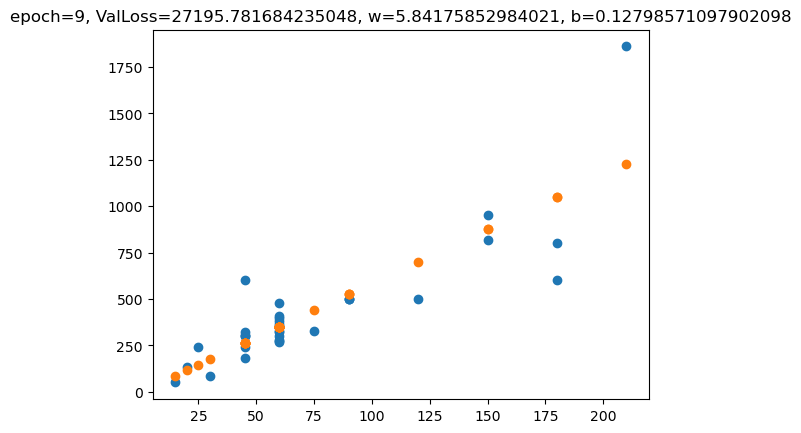

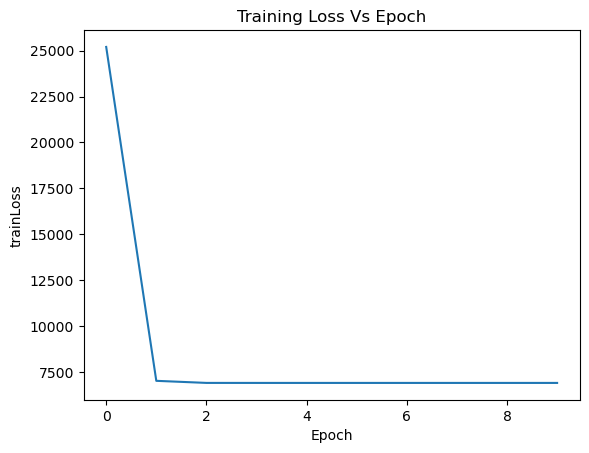

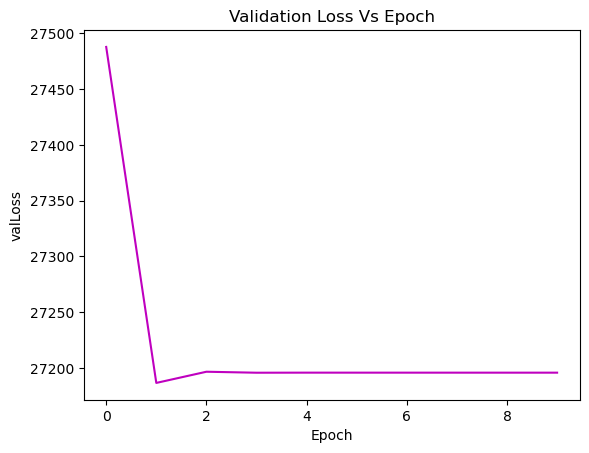

train loss=6901.9855672309295, val loss=27195.778387537266, w=5.841750507124735, b=0.12869205007122733


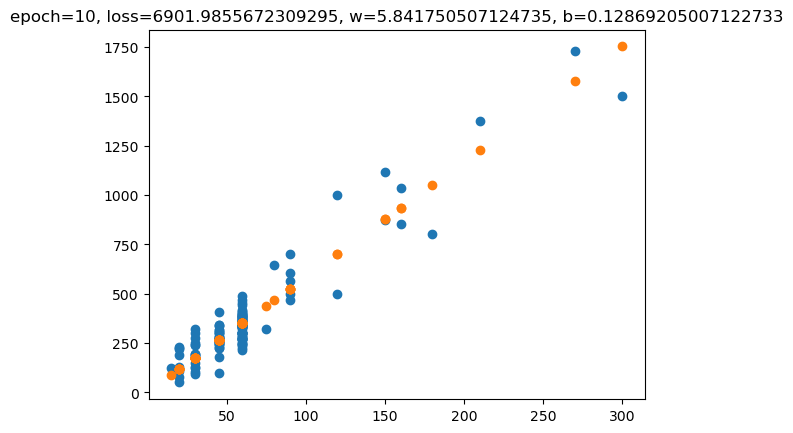

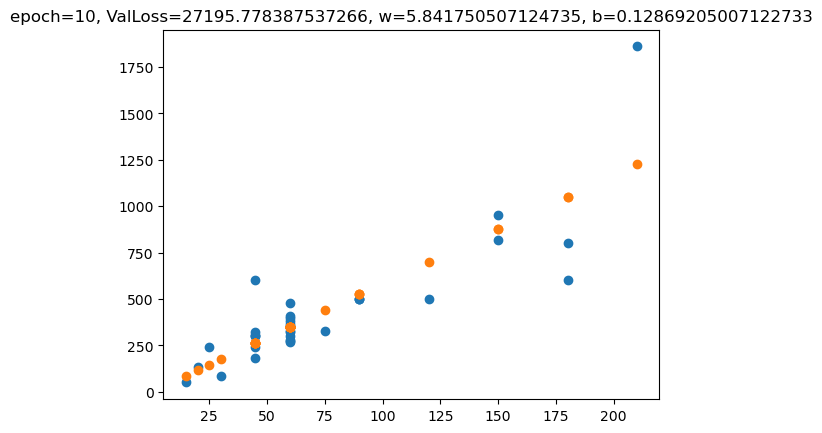

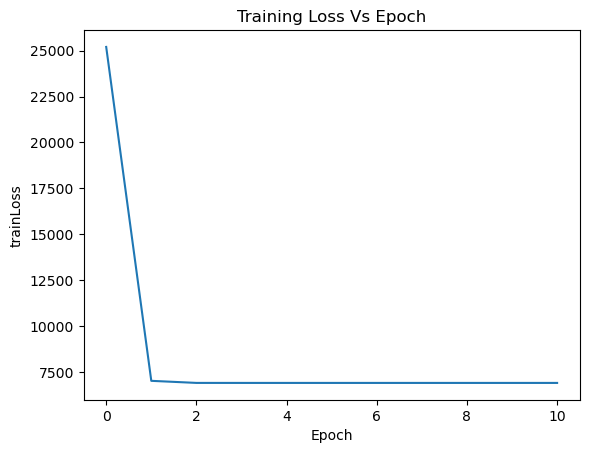

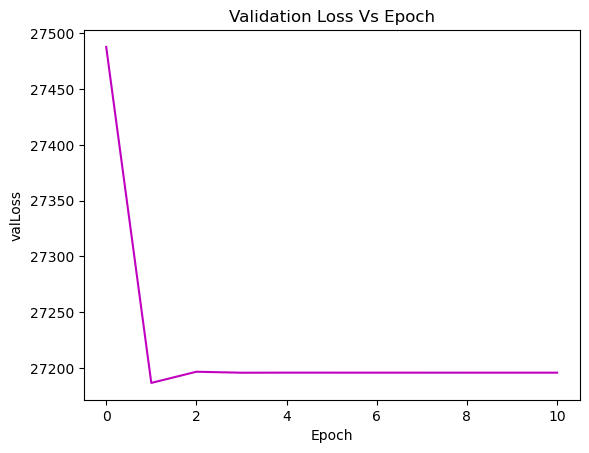

train loss=6901.9805775899495, val loss=27195.775091329502, w=5.841742484877379, b=0.1293983461887367


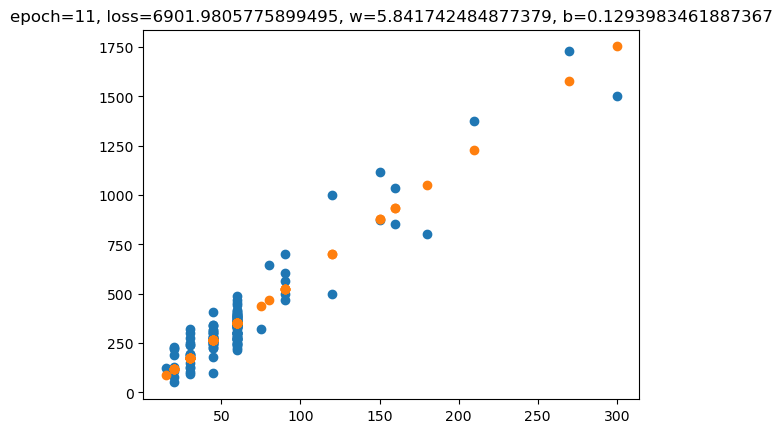

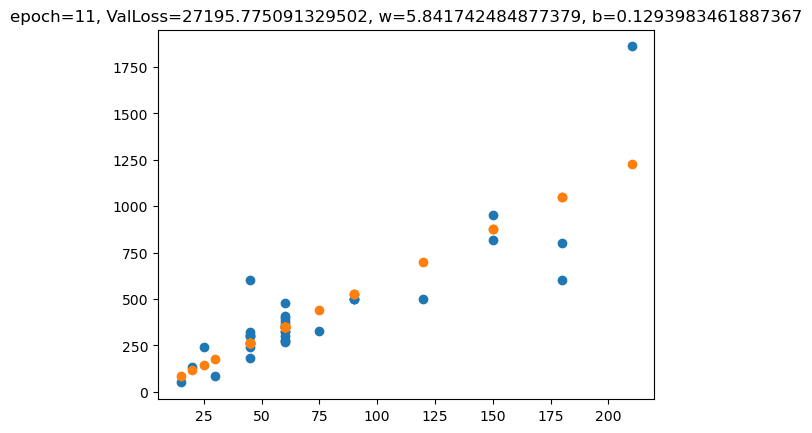

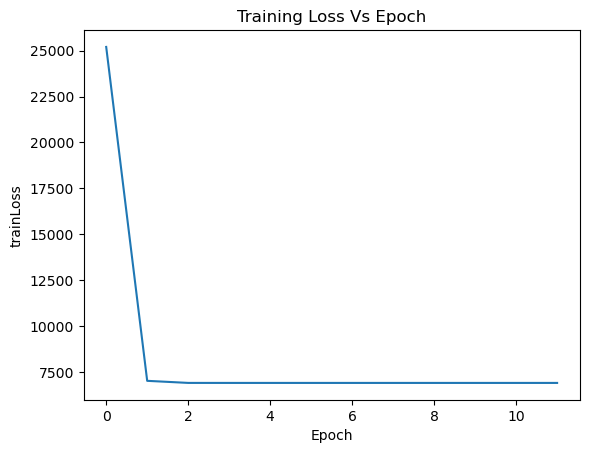

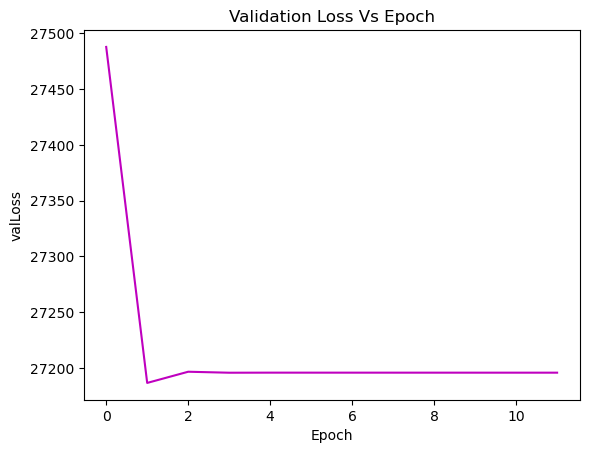

train loss=6901.975588556104, val loss=27195.77179563094, w=5.841734463119684, b=0.13010459933440868


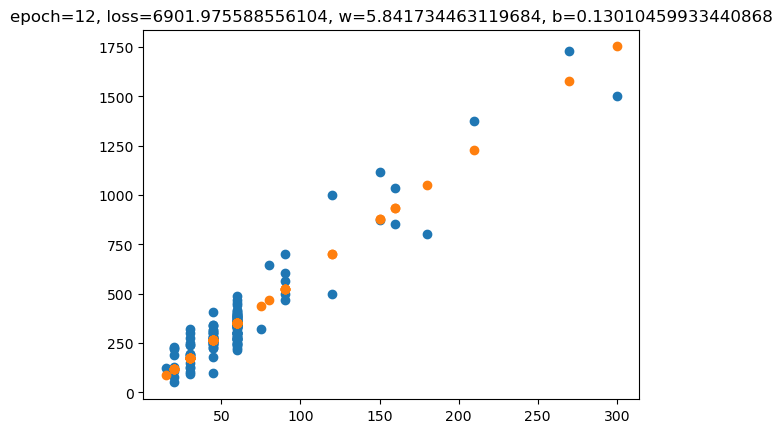

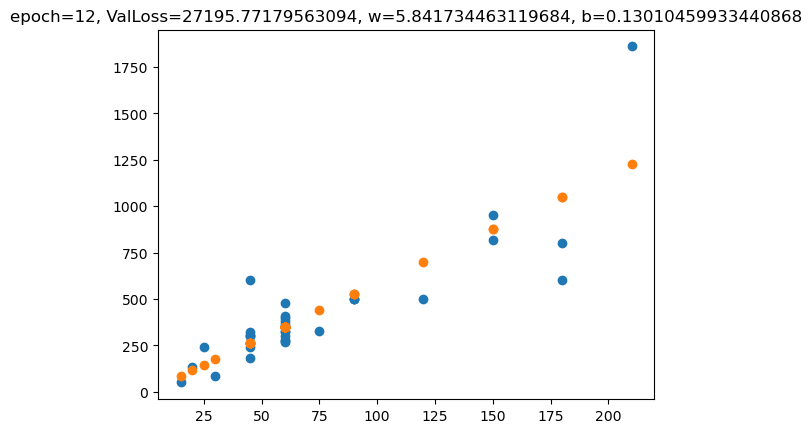

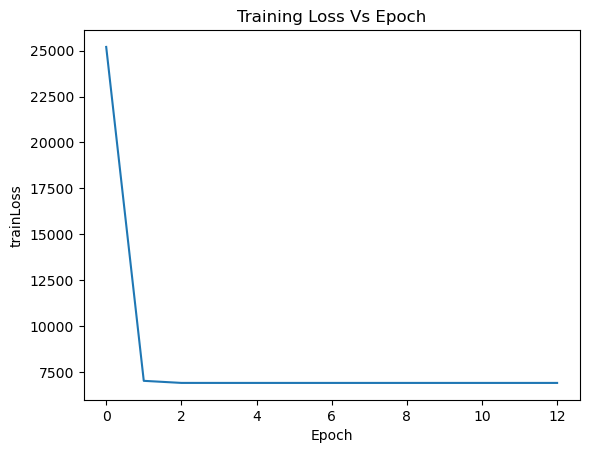

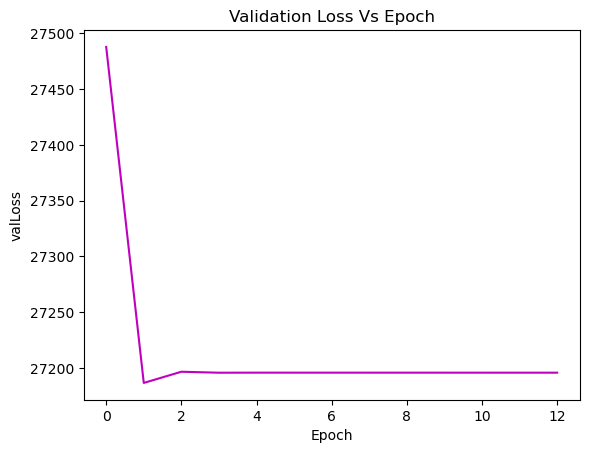

train loss=6901.970600129313, val loss=27195.76850043997, w=5.841726441849916, b=0.13081080951083843


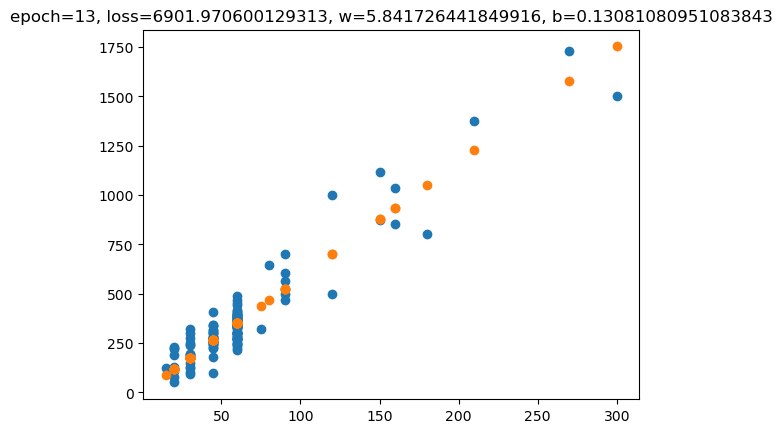

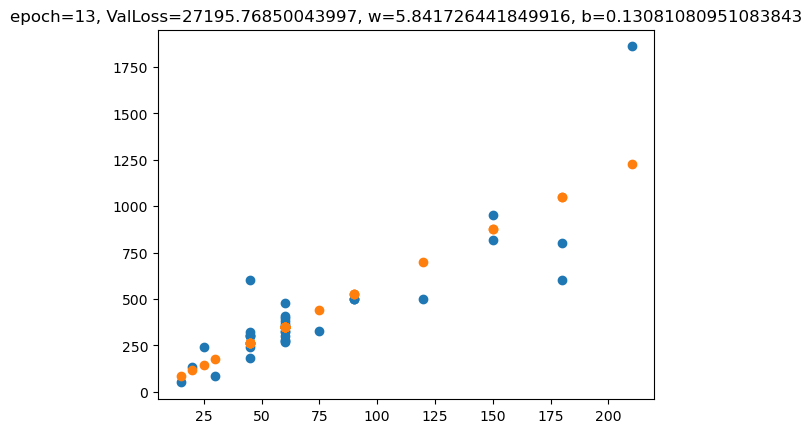

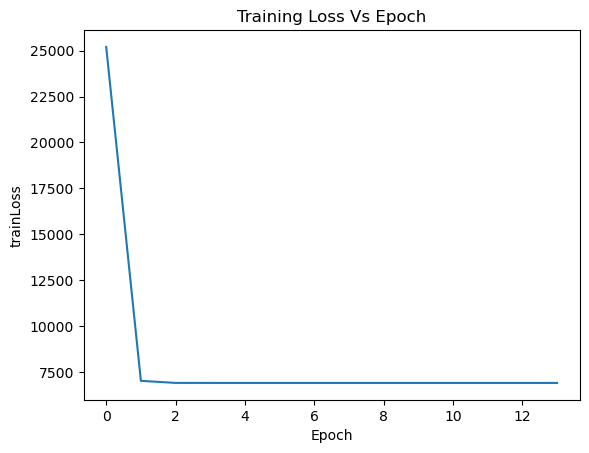

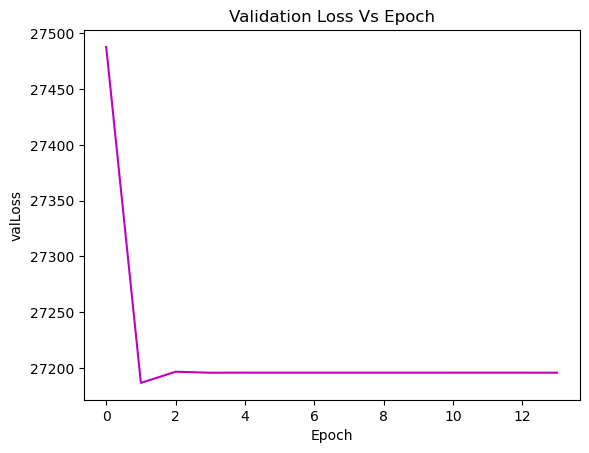

train loss=6901.965612309511, val loss=27195.765205756667, w=5.841718421068181, b=0.13151697672064172


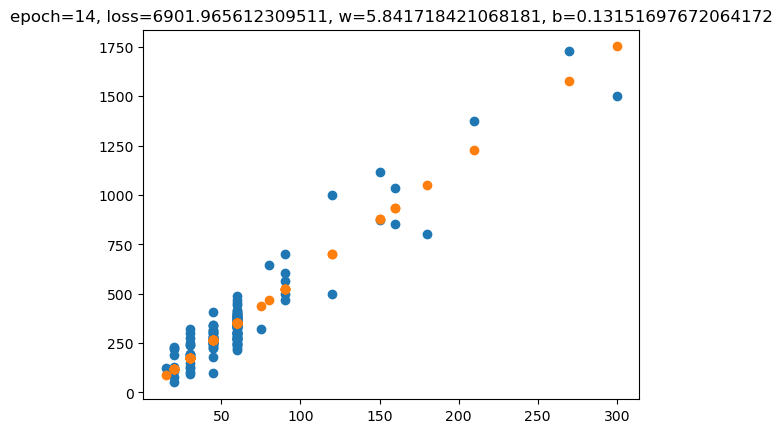

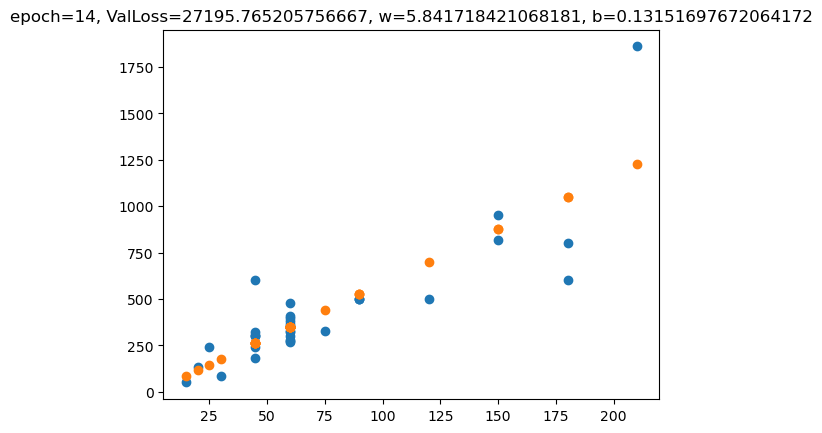

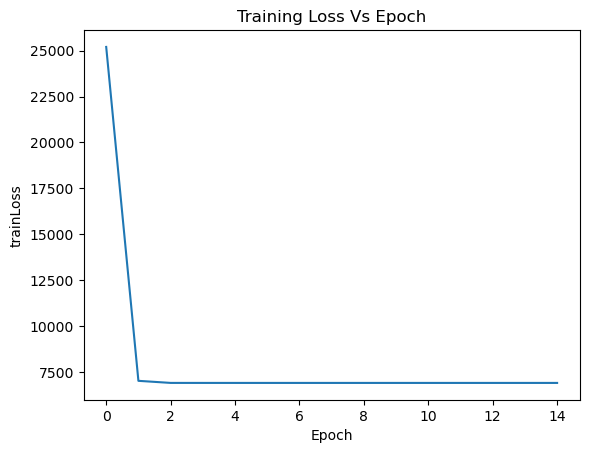

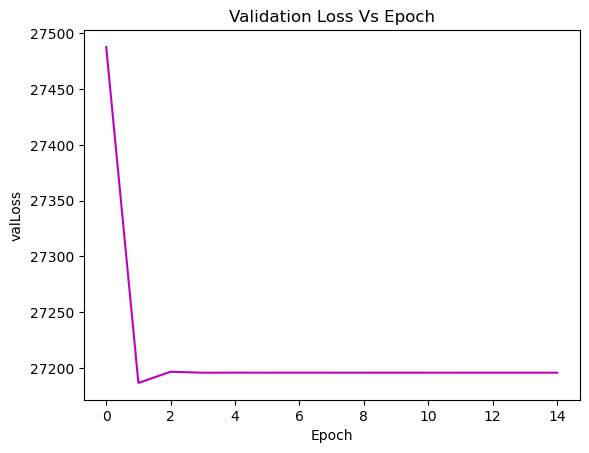

train loss=6901.960625096619, val loss=27195.76191158094, w=5.841710400774439, b=0.1322231009664326


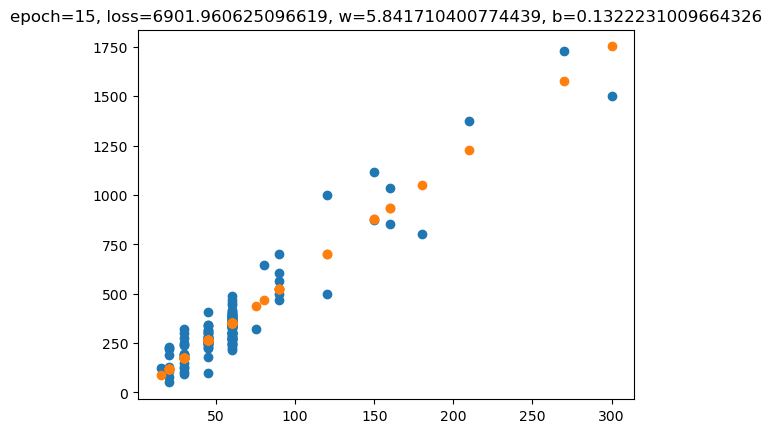

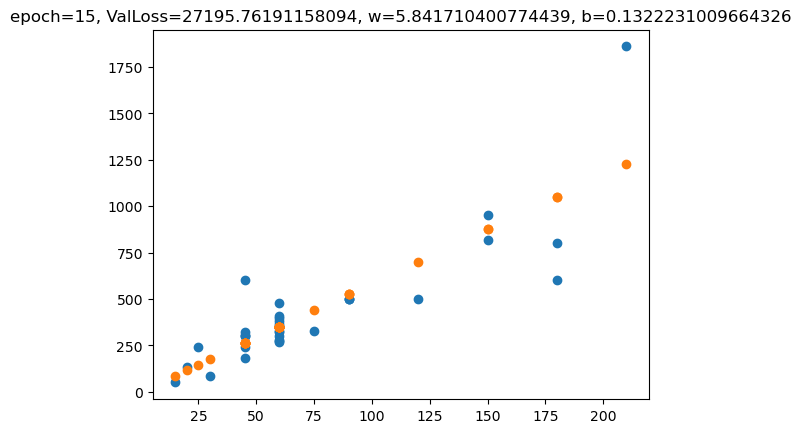

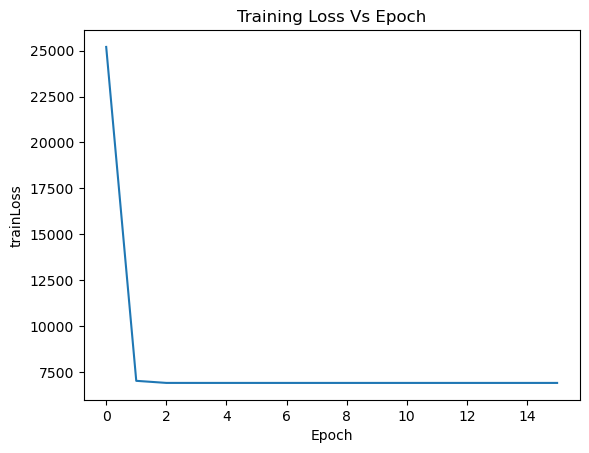

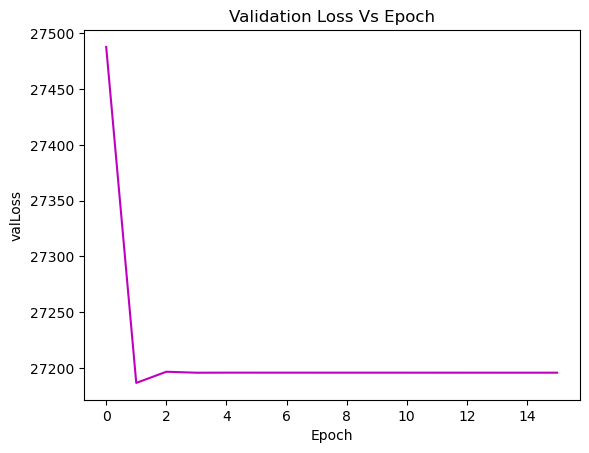

train loss=6901.955638490562, val loss=27195.758617912717, w=5.841702380968661, b=0.1329291822508251


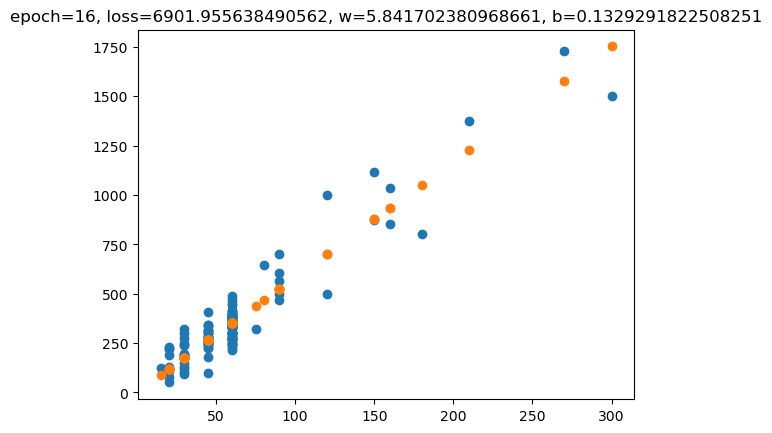

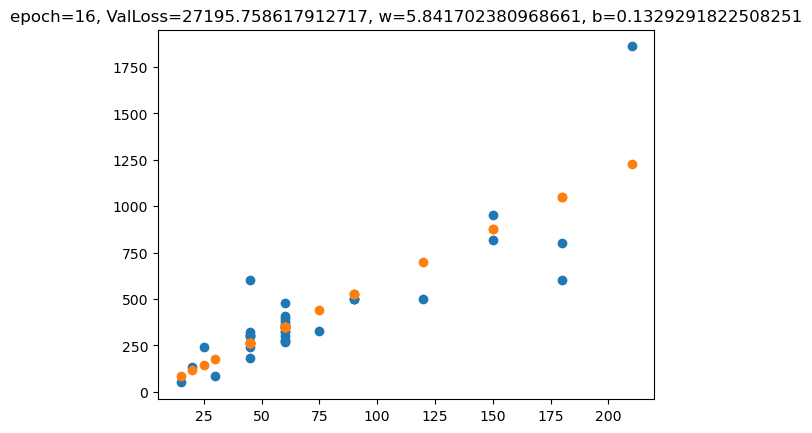

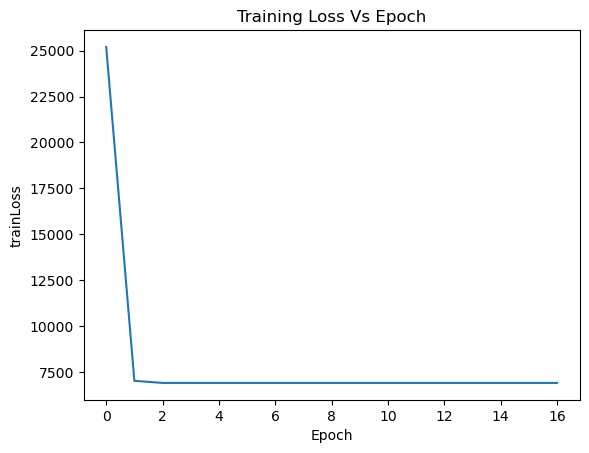

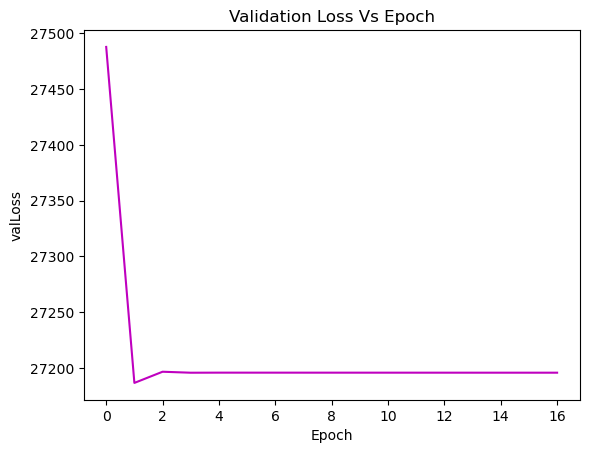

train loss=6901.9506524912695, val loss=27195.755324751946, w=5.841694361650816, b=0.13363522057643296


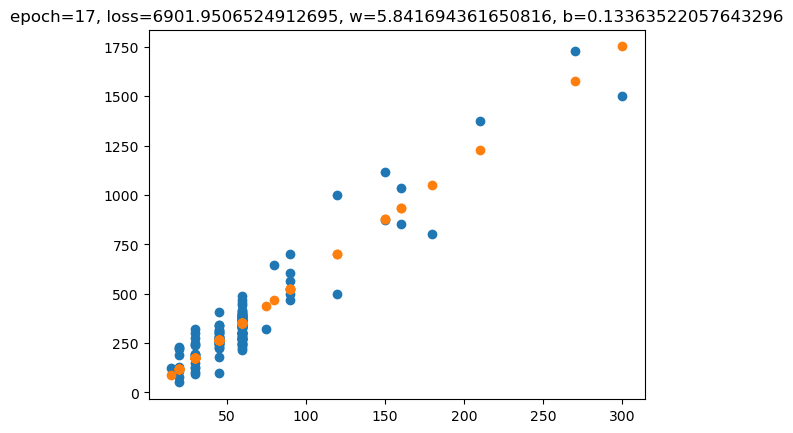

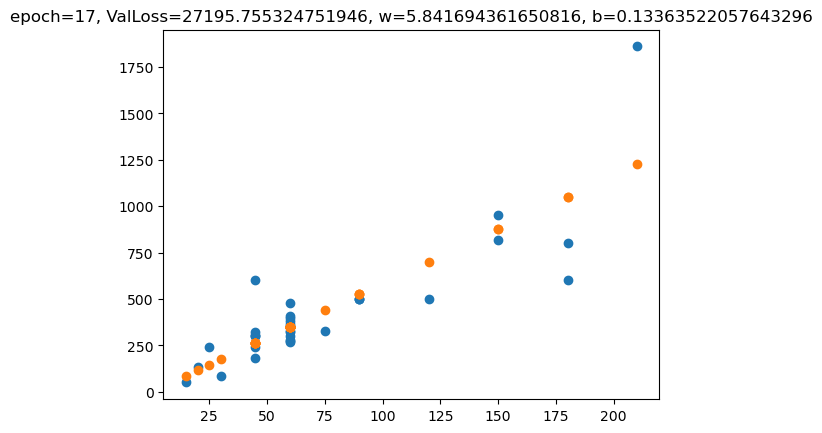

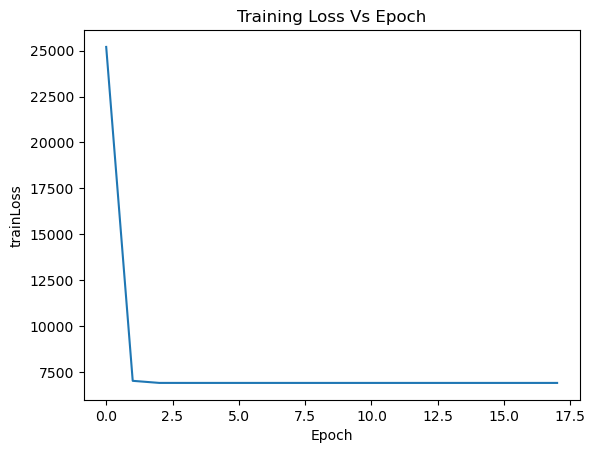

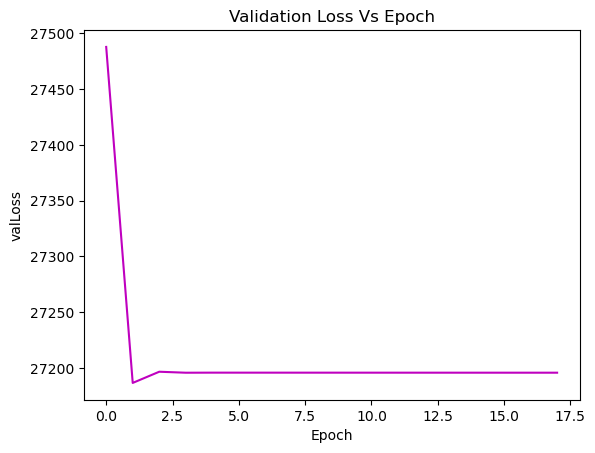

train loss=6901.9456670986665, val loss=27195.752032098535, w=5.841686342820877, b=0.1343412159458699


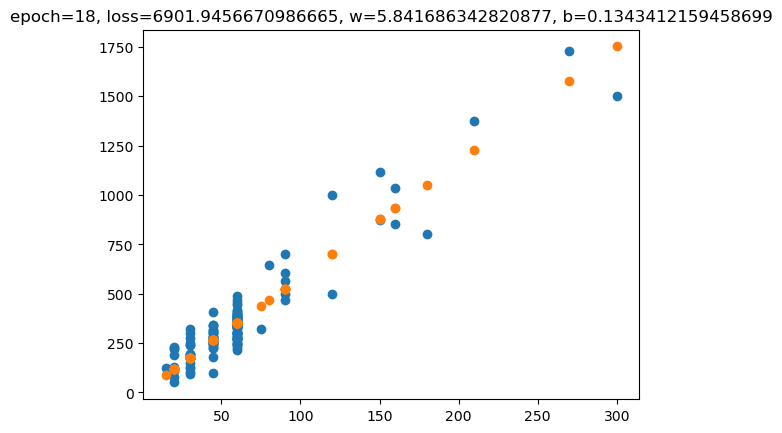

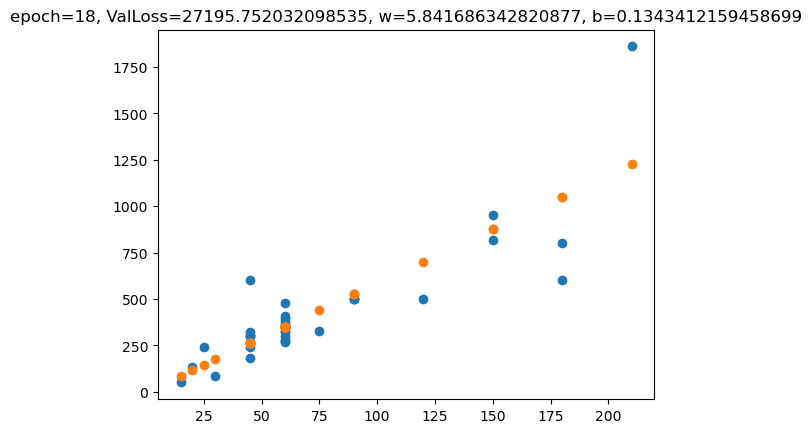

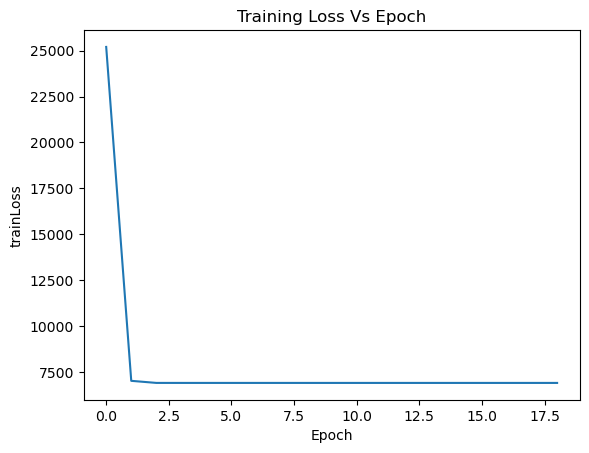

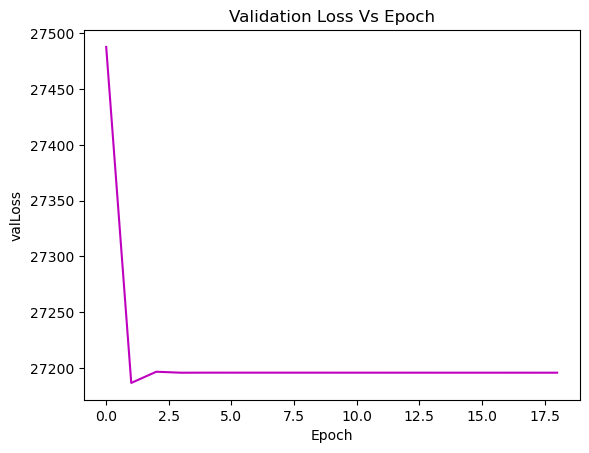

train loss=6901.940682312679, val loss=27195.748739952447, w=5.841678324478812, b=0.13504716836174938


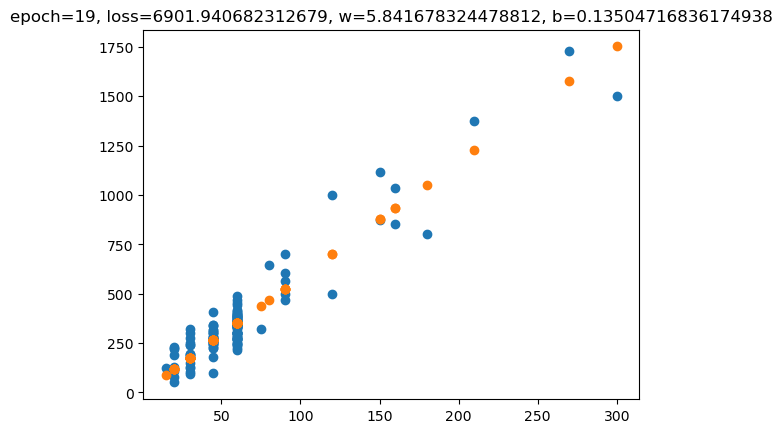

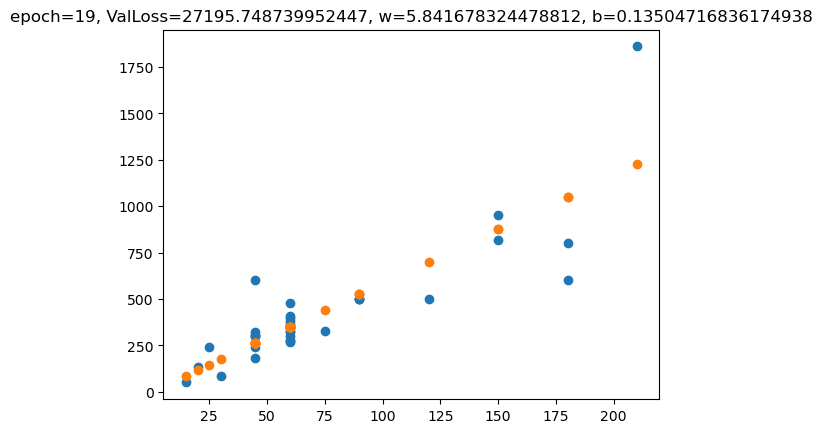

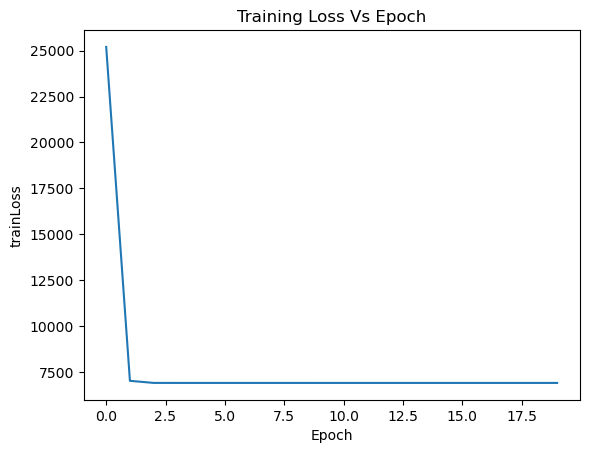

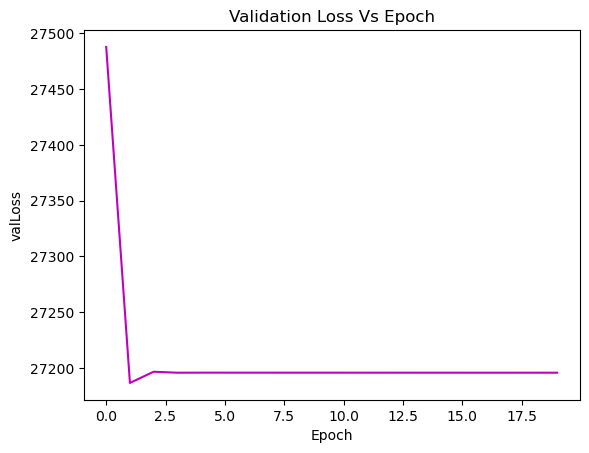

In [40]:
for i in range(20):
    #forward pass
    yhat=w*x_train+b #note vectorized operation
    #MSE loss
    error=yhat-y_train
    loss= (error**2).mean()
    trainLosses.append(loss)
    #computing gradients
    db=2*error.mean()
    dw=2*(x_train*error).mean()
    #weight update
    b=b-lr*db
    w=w-lr*dw

    #val MSE loss
    yhatVal=w*x_val+b
    errorVal=yhatVal-y_val
    valLoss= (errorVal**2).mean()
    valLosses.append(valLoss)

    #stopping condition
    if(valLoss<0.0001):
        break

    print(f'train loss={loss}, val loss={valLoss}, w={w}, b={b}')

    #training data plot
    plt.figure('3')
    plt.cla()
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,yhat)
    plt.title(f'epoch={i}, loss={loss}, w={w}, b={b}')
    plt.show(block=False)
    plt.pause(1)

    #validation data plot
    plt.figure('4')
    plt.cla()
    plt.scatter(x_val,y_val)
    plt.scatter(x_val,yhatVal)
    plt.title(f'epoch={i}, ValLoss={valLoss}, w={w}, b={b}')
    plt.show(block=False)
    plt.pause(1)

    #trainLoss vs Epoch
    plt.figure('5')
    plt.cla()
    plt.plot(trainLosses)
    plt.xlabel('Epoch')
    plt.ylabel('trainLoss')
    plt.title(f'Training Loss Vs Epoch')
    plt.show(block=False)
    plt.pause(1)

    #validationLoss vs Epoch
    plt.figure('6')
    plt.cla()
    plt.plot(valLosses,color='m')
    plt.xlabel('Epoch')
    plt.ylabel('valLoss')
    plt.title(f'Validation Loss Vs Epoch')
    plt.show(block=False)
    plt.pause(1)